In [24]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating a Simple Dataset

In [25]:
x = np.linspace(-2,2, 100)
def f(x):
  return x * 2.0 + 5.0
y = f(x)
print(x)
print(y)

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

In [43]:
w = torch.tensor(16.0)
b = torch.tensor(-17.0)

In [44]:
x = torch.tensor(x)
type(x)

C:\Users\Sanjay Sane\AppData\Local\Temp\ipykernel_18868\3525003048.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


torch.Tensor

In [45]:
y = torch.tensor(y)
type(y)

C:\Users\Sanjay Sane\AppData\Local\Temp\ipykernel_18868\2521706040.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y)


torch.Tensor

In [46]:
class Model(nn.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # In practice, these should be randomly initialized
    self.w = w.clone().detach().requires_grad_(True)
    self.b = b.clone().detach().requires_grad_(True)

  def forward(self, x):
    return self.w * x + self.b

model = Model()

Defining the loss function: Mean Squared Error

In [47]:
def loss(predicted_y, actual_y):
  return torch.mean(torch.square(predicted_y - actual_y))

Function for Plotting 

In [48]:
def plot_data(inputs, outputs, pred_outputs):
  actual = plt.scatter(inputs, outputs, c='blue',label = 'Actual Data')
  predicted = plt.scatter(inputs, pred_outputs, c='red', label = 'Predicted Data')
  plt.legend(loc='best')
  plt.show()


In [49]:
x

tensor([-2.0000, -1.9596, -1.9192, -1.8788, -1.8384, -1.7980, -1.7576, -1.7172,
        -1.6768, -1.6364, -1.5960, -1.5556, -1.5152, -1.4747, -1.4343, -1.3939,
        -1.3535, -1.3131, -1.2727, -1.2323, -1.1919, -1.1515, -1.1111, -1.0707,
        -1.0303, -0.9899, -0.9495, -0.9091, -0.8687, -0.8283, -0.7879, -0.7475,
        -0.7071, -0.6667, -0.6263, -0.5859, -0.5455, -0.5051, -0.4646, -0.4242,
        -0.3838, -0.3434, -0.3030, -0.2626, -0.2222, -0.1818, -0.1414, -0.1010,
        -0.0606, -0.0202,  0.0202,  0.0606,  0.1010,  0.1414,  0.1818,  0.2222,
         0.2626,  0.3030,  0.3434,  0.3838,  0.4242,  0.4646,  0.5051,  0.5455,
         0.5859,  0.6263,  0.6667,  0.7071,  0.7475,  0.7879,  0.8283,  0.8687,
         0.9091,  0.9495,  0.9899,  1.0303,  1.0707,  1.1111,  1.1515,  1.1919,
         1.2323,  1.2727,  1.3131,  1.3535,  1.3939,  1.4343,  1.4747,  1.5152,
         1.5556,  1.5960,  1.6364,  1.6768,  1.7172,  1.7576,  1.7980,  1.8384,
         1.8788,  1.9192,  1.9596,  2.00

In [50]:
model(x)

tensor([-49.0000, -48.3535, -47.7071, -47.0606, -46.4141, -45.7677, -45.1212,
        -44.4747, -43.8283, -43.1818, -42.5354, -41.8889, -41.2424, -40.5960,
        -39.9495, -39.3030, -38.6566, -38.0101, -37.3636, -36.7172, -36.0707,
        -35.4242, -34.7778, -34.1313, -33.4848, -32.8384, -32.1919, -31.5455,
        -30.8990, -30.2525, -29.6061, -28.9596, -28.3131, -27.6667, -27.0202,
        -26.3737, -25.7273, -25.0808, -24.4343, -23.7879, -23.1414, -22.4949,
        -21.8485, -21.2020, -20.5556, -19.9091, -19.2626, -18.6162, -17.9697,
        -17.3232, -16.6768, -16.0303, -15.3838, -14.7374, -14.0909, -13.4444,
        -12.7980, -12.1515, -11.5051, -10.8586, -10.2121,  -9.5657,  -8.9192,
         -8.2727,  -7.6263,  -6.9798,  -6.3333,  -5.6869,  -5.0404,  -4.3939,
         -3.7475,  -3.1010,  -2.4545,  -1.8081,  -1.1616,  -0.5152,   0.1313,
          0.7778,   1.4242,   2.0707,   2.7172,   3.3636,   4.0101,   4.6566,
          5.3030,   5.9495,   6.5960,   7.2424,   7.8889,   8.53

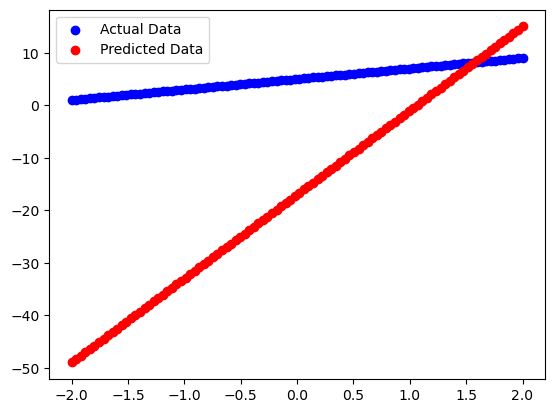

In [51]:
plot_data(x.numpy(),y.numpy(),model(x).detach().numpy())

**Initial Loss**: Loss calculated on applying initialized values

In [52]:
loss(model(x),y)

tensor(750.6128, dtype=torch.float64, grad_fn=<MeanBackward0>)

This is what is to be minimized.

Initial Weights:

In [53]:
print(model.w.detach().numpy(), model.b.detach().numpy())

16.0 -17.0


Defining the training loop

In [54]:
model.w.grad

In [55]:
model.w

tensor(16., requires_grad=True)

In [56]:
type(model.b.grad)

NoneType

In [57]:
def train(model, inputs, outputs, learning_rate):
  current_loss = loss(model(inputs),outputs)
  current_loss.backward() # Calculates the gradient
  model.w.data = w.data - learning_rate * model.w.grad
  model.b.data = b.data - learning_rate * model.b.grad
  return current_loss;

In [62]:
model = Model()
list_w = []
list_b = []
losses = []
for epoch in range(50):
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' % (epoch,model.w.detach().numpy(),model.b.detach().numpy(),curr_loss))
  list_w.append(model.w.detach().numpy())
  list_b.append(model.b.detach().numpy())
  curr_loss = train(model, x, y, learning_rate=0.1)
  losses.append(curr_loss.detach().numpy())
  


Epoch  0: w=16.00 b=-17.00, loss=0.00000
Epoch  1: w=12.19 b=-12.60, loss=750.61279
Epoch  2: w=9.42 b=-9.08, loss=451.03962
Epoch  3: w=7.40 b=-6.26, loss=273.11123
Epoch  4: w=5.93 b=-4.01, loss=166.54899
Epoch  5: w=4.86 b=-2.21, loss=102.22376
Epoch  6: w=4.08 b=-0.77, loss=63.10879
Epoch  7: w=3.52 b=0.39, loss=39.16322
Epoch  8: w=3.10 b=1.31, loss=24.41456
Epoch  9: w=2.80 b=2.05, loss=15.28095
Epoch 10: w=2.58 b=2.64, loss=9.59733
Epoch 11: w=2.43 b=3.11, loss=6.04558
Epoch 12: w=2.31 b=3.49, loss=3.81793
Epoch 13: w=2.23 b=3.79, loss=2.41632
Epoch 14: w=2.16 b=4.03, loss=1.53206
Epoch 15: w=2.12 b=4.23, loss=0.97289
Epoch 16: w=2.09 b=4.38, loss=0.61861
Epoch 17: w=2.06 b=4.50, loss=0.39377
Epoch 18: w=2.05 b=4.60, loss=0.25088
Epoch 19: w=2.03 b=4.68, loss=0.15996
Epoch 20: w=2.02 b=4.75, loss=0.10206
Epoch 21: w=2.02 b=4.80, loss=0.06515
Epoch 22: w=2.01 b=4.84, loss=0.04160
Epoch 23: w=2.01 b=4.87, loss=0.02658
Epoch 24: w=2.01 b=4.90, loss=0.01699
Epoch 25: w=2.00 b=4.92, 

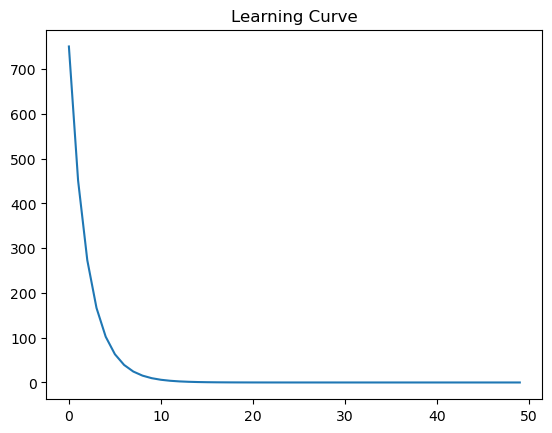

In [64]:
plt.plot(np.arange(0,50), losses)
plt.title("Learning Curve")
plt.show()